# データの素性の確認

In [63]:
import pandas as pd

# Loading the data
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

original_train = train.copy() 

# Store our test passenger IDs for easy access
PassengerId = test['PassengerId']

# Showing overview of the train dataset
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [64]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [65]:
print(test.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## データに欠損値がある

（train:AgetとCabin、Embarkedに欠損値　、test: Age, Fare, Cabinに欠損値）<br>
　→欠損値があると、ルールの作成に悪影響がある<br>
　→アルゴリズムでエラーが出ることがある<br>
　必要がなさそうなら行ごと削除、もしくは平均値や中央値で補完する、などの処理を行う必要あり<br>

## データには名前や性別の「male」や「female」、乗船地の「S」「C」「Q」といった文字列が含まれる

 →多くの機械学習モデルは、数値データしか理解できない（入力できない）<br>
 →文字列は数値のように計算できない<br>
 そのため、文字列を符号化（数値に置き換える）する必要あり<br>

## 数値データの大きさも様々

　→スケールを揃える（標準化する）必要がある<br>
 
つまり、既に数値になっていて、欠損値が無いデータを使えば、すぐモデルが作れちゃうわけです。<br>

が、まずは各データ詳細を見ていきましょう

## Survivedの確認

<Axes: xlabel='Survived', ylabel='count'>

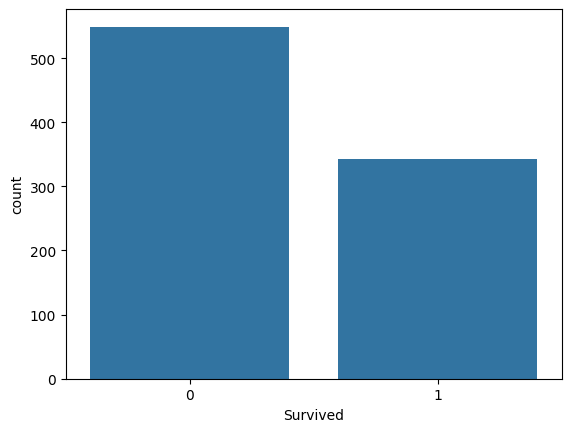

In [66]:
import seaborn as sns
sns.countplot(x='Survived', data=train)

死亡者(Survived=0)の方が、生存者(Survived=1)より多い

<Axes: xlabel='Pclass', ylabel='count'>

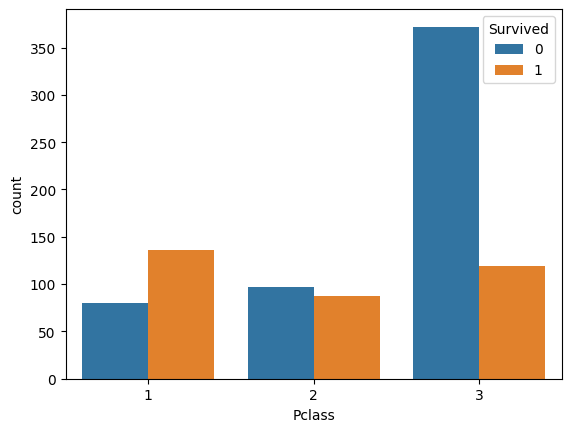

In [67]:
#「Pclass(チケットのランク)」の確認
sns.countplot(x='Pclass', hue='Survived', data=train)

概ね、チケットのランクが高い程、生存率(生存の場合Survived=1)が高い
→今回はPclassは使う

## 「Sex(性別)」の確認

            mean  count
Sex                    
female  0.742038    314
male    0.188908    577


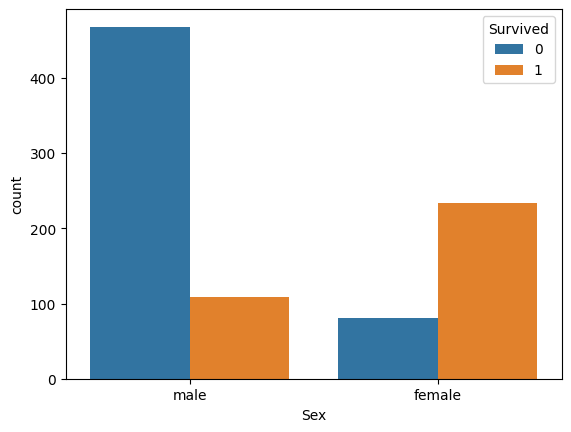

In [68]:
# 「Sex(性別)」の確認
sns.countplot(x='Sex', hue='Survived', data=train)
# 性別ごとの生存率と乗客数を計算
sex_stats = train['Survived'].groupby(train['Sex']).agg(['mean', 'count'])

# 結果を表示
print(sex_stats)

→今回は、Nameを扱わず、Sexを扱うものとする

In [69]:
# Name列をドロップ
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Age(年齢)の確認

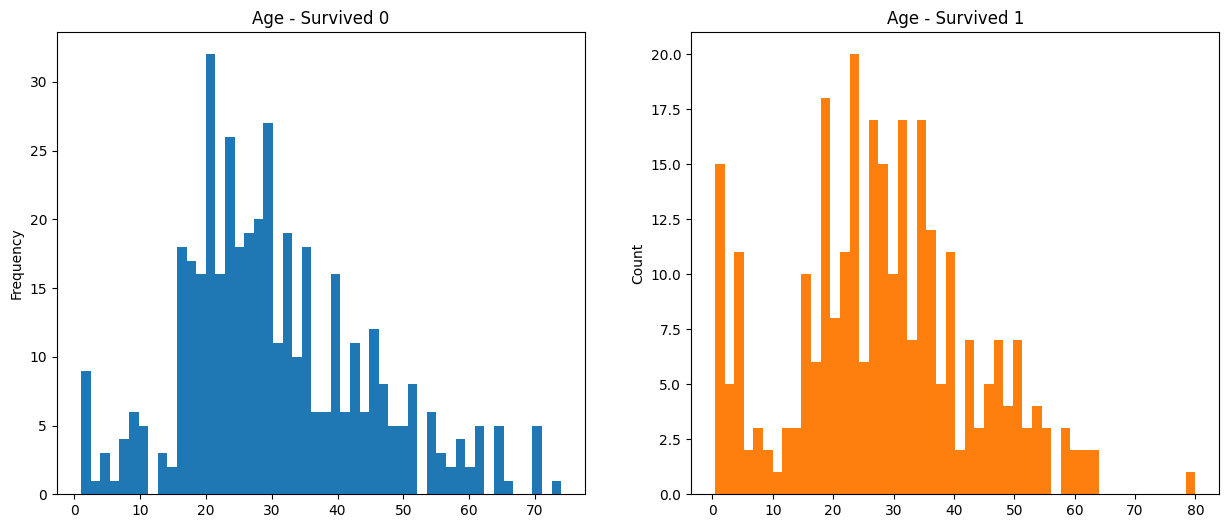

In [70]:
import matplotlib.pyplot as plt
#「Age(年齢)」の確認
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Survivedが0の乗客の年齢分布をプロット
train[train['Survived'] == 0]['Age'].plot(
    kind='hist', 
    bins=50, 
    title='Age - Survived 0', 
    color=cmap(0), 
    ax=ax[0]
)

# Survivedが1の乗客の年齢分布をプロット
train[train['Survived'] == 1]['Age'].plot(
    kind='hist', 
    bins=50, 
    title='Age - Survived 1', 
    color=cmap(1), 
    ax=ax[1]
)

plt.ylabel('Count')
plt.show()

赤ちゃんは生き残っている可能性が高そうという部分はあるが、ほかはさほど影響していない？
→今回は、Ageは使わないこととします。

In [71]:
# Age列をドロップ
train = train.drop('Age', axis=1)
test = test.drop('Age', axis=1)

train.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='SibSp', ylabel='Survived'>

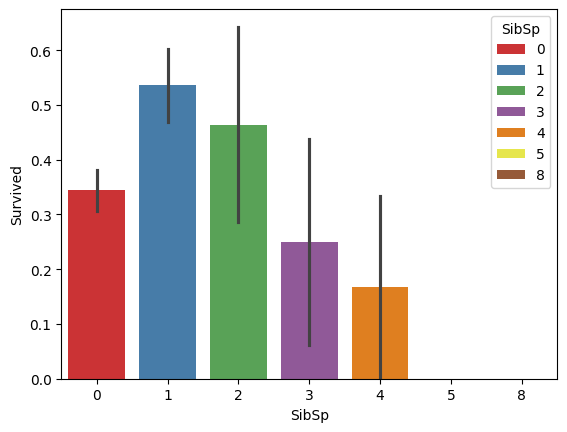

In [72]:
# SibSp(同乗している兄弟、配偶者の数)の確認
sns.barplot(x='SibSp', y='Survived', hue='SibSp', data=train, palette='Set1', dodge=False)

SibSpが大きいと、生存率が低下する傾向がありそう→今回使う

<Axes: xlabel='Parch', ylabel='Survived'>

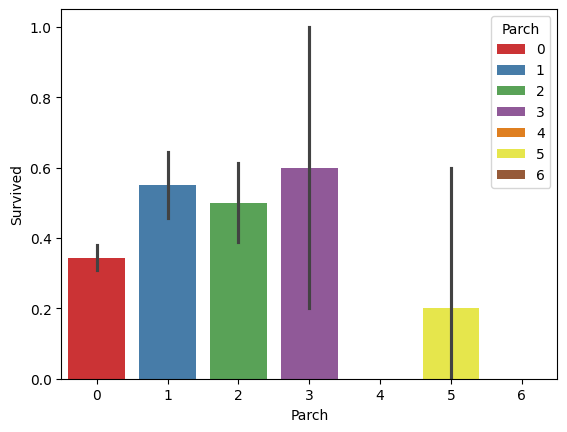

In [73]:
# Parch(同乗している親・子供の数)の確認
sns.barplot(x='Parch', y='Survived',  hue='Parch', data=train, palette='Set1', dodge=False)

Parch（親・子供の数）による明確な差は判断が難しい→今回は使わない

In [74]:
# Parchをドロップ
train = train.drop('Parch', axis=1)
test = test.drop('Parch', axis=1)

train.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,1,A/5 21171,7.2500,NaN,S
1,2,1,1,female,1,PC 17599,71.2833,C85,C
2,3,1,3,female,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: xlabel='Embarked', ylabel='Survived'>

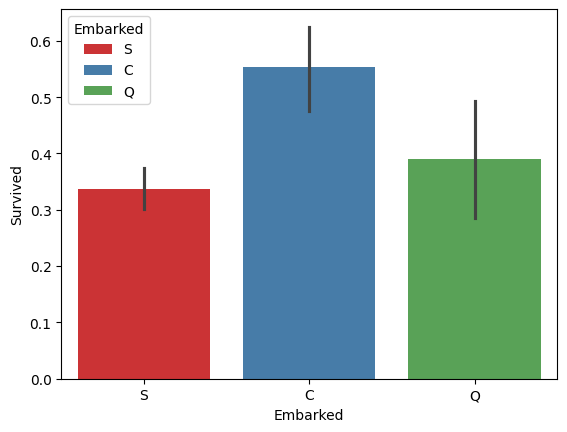

In [75]:
#「Embarked」（乗船した港）の確認
sns.barplot(x='Embarked', y='Survived',  hue='Embarked', data=train, palette='Set1', dodge=False)

Embarkedは結果に関連していそうな気も？→今回使う

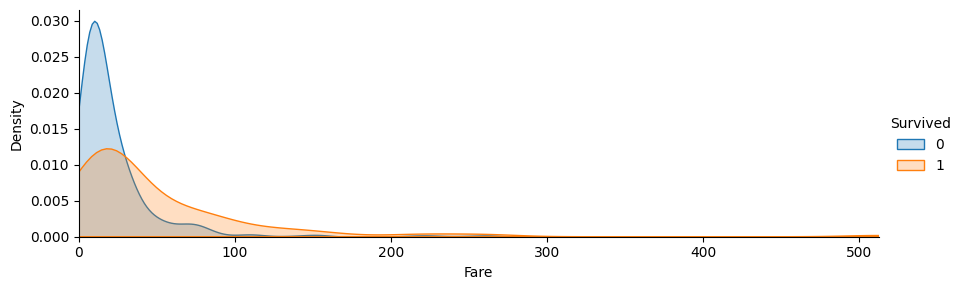

In [76]:
#fareの確認
fare_s = sns.FacetGrid(train, hue='Survived', aspect=3)
fare_s.map(sns.kdeplot, 'Fare', fill=True)  # shadeをfillに変更
fare_s.set(xlim=(0, train['Fare'].max()))
fare_s.add_legend()

plt.show()

料金が低いほど、生存率も低いよう→使う

In [77]:
# TicketとCabinは今回使わないこととする
columns_to_drop = ['Ticket', 'Cabin']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

train.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,1,0,3,male,1,7.2500,S
1,2,1,1,female,1,71.2833,C
2,3,1,3,female,0,7.9250,S


In [78]:
# 各列の欠損値の数を表示
print("Train Dataset Missing Values:")
print(train.isnull().sum())
print("\nTest Dataset Missing Values:")
print(test.isnull().sum())

Train Dataset Missing Values:
PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Fare           0
Embarked       2
dtype: int64

Test Dataset Missing Values:
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Fare           1
Embarked       0
dtype: int64


In [79]:
# Embarkedの欠損値を最頻値で補完
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Fareの欠損値を平均値で補完
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


In [80]:
# 各列の欠損値の数を表示
print("Train Dataset Missing Values:")
print(train.isnull().sum())
print("\nTest Dataset Missing Values:")
print(test.isnull().sum())

Train Dataset Missing Values:
PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Fare           0
Embarked       0
dtype: int64

Test Dataset Missing Values:
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Fare           0
Embarked       0
dtype: int64


In [81]:
# カテゴリカルデータの数値化（ワンホットエンコーディング）
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

In [82]:
# 不要な列 PassengerIdのドロップ
columns_to_drop = ['PassengerId']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

In [83]:
# Showing overview of the train dataset
train.head(10)

,Survived,Pclass,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,7.2500,True,False,True
1,1,1,1,71.2833,False,False,False
2,1,3,0,7.9250,False,False,True
3,1,1,1,53.1000,False,False,True
4,0,3,0,8.0500,True,False,True
5,0,3,0,8.4583,True,True,False
6,0,1,0,51.8625,True,False,True
7,0,3,3,21.0750,True,False,True
8,1,3,0,11.1333,False,False,True
9,1,2,1,30.0708,False,False,False


In [84]:
print(train.dtypes)
print(test.dtypes)

Survived        int64
Pclass          int64
SibSp           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
Pclass          int64
SibSp           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


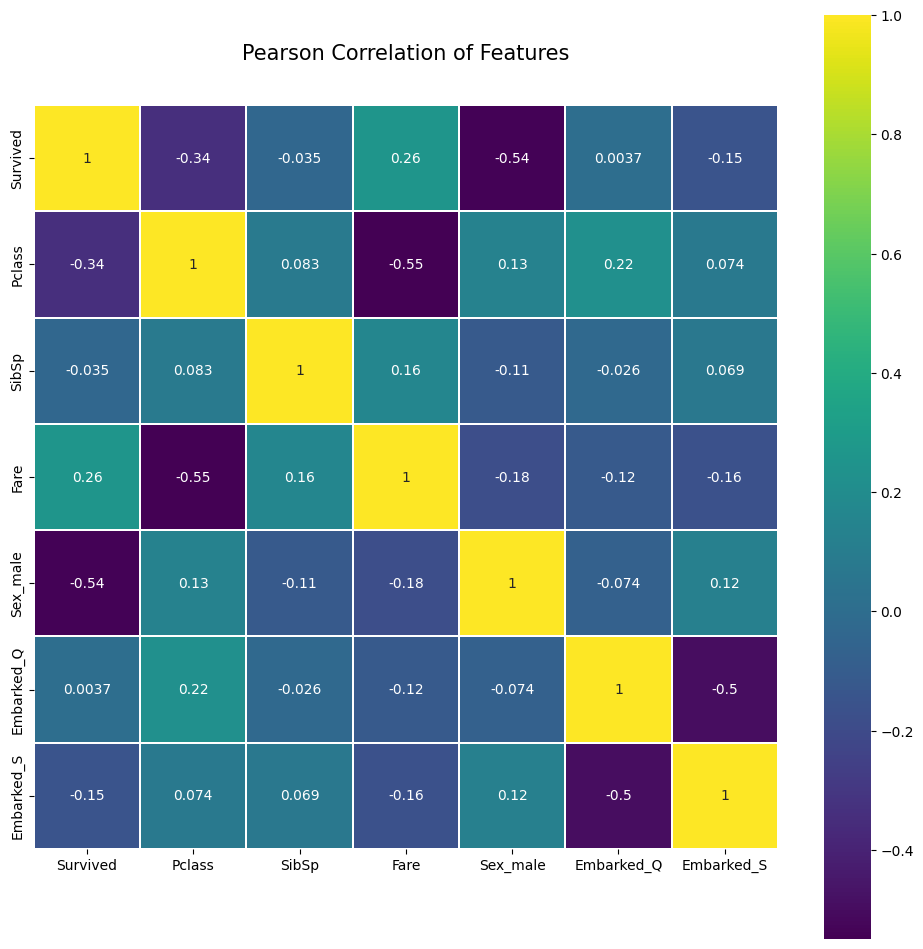

Survived      1.000000
Fare          0.257307
Embarked_Q    0.003650
SibSp        -0.035322
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


In [85]:

import seaborn as sns

# 数値データに変換（すべての数値型を含む）
#numeric_train = train.select_dtypes(include=['number', 'bool'])

# 相関行列の計算
corr_matrix = train.corr()

# カラーマップの設定
colormap = plt.cm.viridis

# ヒートマップの作成
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_matrix, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


survived_corr = corr_matrix["Survived"].sort_values(ascending=False)
print(survived_corr)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train[['Pclass', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train['Survived']

# データセットを訓練セットとテストセットに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [87]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [88]:
def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f'Best params: {best_params}')
    print(f'Best cross-validation accuracy: {best_score:.4f}')
    return grid_search.best_estimator_


In [89]:
# ランダムフォレスト
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 11)}
best_rf = perform_grid_search(RandomForestClassifier(), rf_param_grid, X, y)

# テストデータセットの予測結果を生成
y_test_pred_rf = best_rf.predict(test)


Best params: {'max_depth': 8, 'n_estimators': 100}
Best cross-validation accuracy: 0.8160


In [90]:
# 勾配ブースティング
gb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 11)}
best_gb = perform_grid_search(GradientBoostingClassifier(), gb_param_grid, X, y)

# テストデータセットの予測結果を生成
y_test_pred_gb = best_gb.predict(test)


Best params: {'max_depth': 4, 'n_estimators': 200}
Best cross-validation accuracy: 0.8138


In [91]:
# k-NN
knn_param_grid = {'n_neighbors': range(1, 21)}
best_knn = perform_grid_search(KNeighborsClassifier(), knn_param_grid, X, y)

# テストデータセットの予測結果を生成
y_test_pred_knn = best_knn.predict(test)


Best params: {'n_neighbors': 4}
Best cross-validation accuracy: 0.7531


In [92]:
# SVM
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
best_svm = perform_grid_search(SVC(), svm_param_grid, X, y)

# テストデータセットの予測結果を生成
y_test_pred_svm = best_svm.predict(test)


Best params: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation accuracy: 0.7867


In [93]:
# 予測結果をデータフレームに変換し、CSVファイルに保存
submission_knn = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_test_pred_knn})
submission_svm = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_test_pred_svm})
submission_rf = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_test_pred_rf})
submission_gb = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_test_pred_gb})

submission_knn.to_csv('submission_knn.csv', index=False)
submission_svm.to_csv('submission_svm.csv', index=False)
submission_rf.to_csv('submission_rf.csv', index=False)
submission_gb.to_csv('submission_gb.csv', index=False)


In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd
import numpy as np

# データの準備
y_train = train['Survived'].values
x_train = train.drop('Survived', axis=1).values
x_test = test.values

# データの型をfloat32に変換
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)

# モデルの構築
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1)

# テストデータセットの予測結果を生成
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# 予測結果をデータフレームに変換し、CSVファイルに保存
submission = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": y_pred.flatten()
})
submission.to_csv('submission_nn.csv', index=False)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.5629 - loss: 0.9267 
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.7143 - loss: 0.5578
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7197 - loss: 0.5648
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7165 - loss: 0.5481
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.7511 - loss: 0.5319
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7435 - loss: 0.5512
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7733 - loss: 0.5047
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8092 - loss: 0.4892
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7661 - loss: 0.5342
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.7942 - loss: 0.4986
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7832 - loss: 0.4777
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/ste